## Distribución Hipergeométrica

Consideremos el experimento "extraer a la vez (o una detrás de otra, sin retornarlos) $n$ objetos donde hay $N$ de tipo A y $M$ de tipo B". Si $X$ es variable aleatoria que mide el "número de objetos del tipo A", diremos que $X$ se distribuye como una Hipergeométrica con parámetros $N,M,n$
$$X\sim \text{H}(N,M,n)$$

- El **dominio** de $X$ será $D_X = \{0,1,2,\dots,N\}$ (en general)
- La **función de probabilidad** vendrá dada por $$f(k) = \frac{{N\choose k}{M\choose n-k}}{N+M\choose n}$$

## Funcion:

- La **función de distribución** vendrá dada por $$F(x) = \left\{
\begin{array}{cl}
     0 & \text{si } x<0 
  \\ \sum_{k=0}^xf(k) & \text{si } 0\le x<n
  \\ 1 & \text{si } x\ge n
\end{array}
\right.$$
- **Esperanza** $E(X) = \frac{nN}{N+M}$ 
- **Varianza** $Var(X) = \frac{nNM}{(N+M)^2}\cdot\frac{N+M-n}{N+M-1}$



## Distribución Hipergeométrica CODIGO

El código de la distribución Hipergeométrica:

- En `R` tenemos las funciones del paquete `Rlab`: `dhyper(x, m, n, k), phyper(q,  m, n, k), qhyper(p,  m, n, k), rhyper(nn,  m, n, k)` donde `m` es el número de objetos del primer tipo, `n` el número de objetos del segundo tipo y `k` el número de extracciones realizadas.


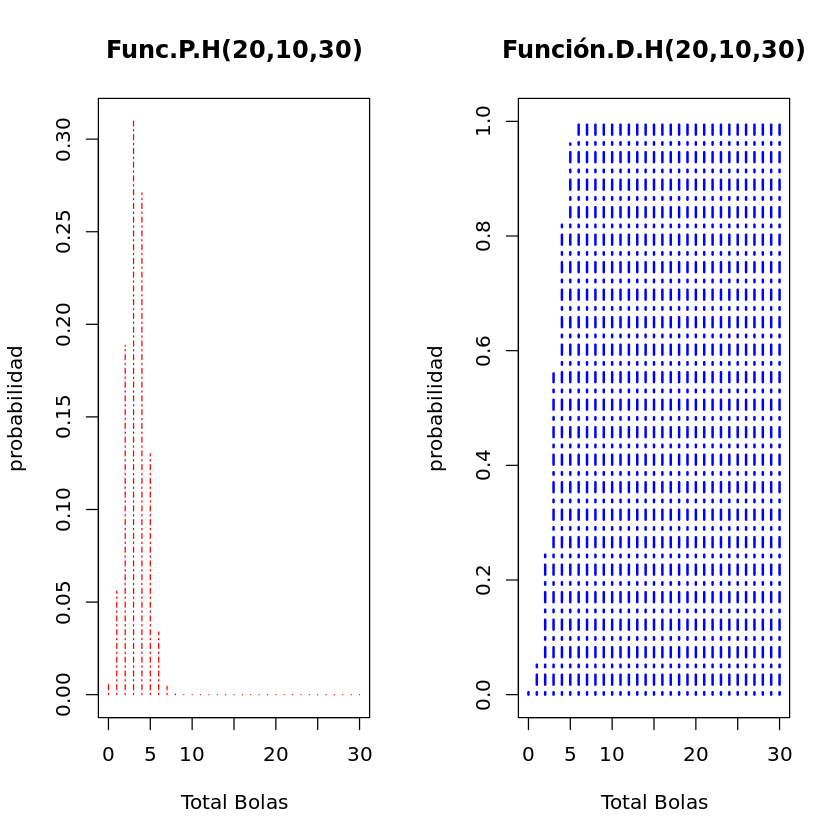

In [22]:
par(mfrow = c(1,2))
plot(0:30, dhyper(0:30,10,20,10),col = "red", xlab = "Total Bolas",
    ylab = "probabilidad", main = "Func.P.H(20,10,30)",type="h",lty=4)
plot(0:30, phyper(0:30,10,20,10),col = "blue", xlab = "Total Bolas",
     ylab = "probabilidad", main = "Función.D.H(20,10,30)",
     ylim = c(0,1),type="h",lty=4,lwd=2)
par(mfrow= c(1,1))


##  EJERCICIO:

Supongamos que tenemos 20 postulados para un trabajo de datascience de los cuales 7 son estadisticos, queremos medir la probabilidad de encontrar un numero determinado de postulados si elegimos $k=12$

In [56]:
#PASO1: Definir nuestras variables
M = 7
N = 13
r = 12

In [57]:
print(dhyper(x=0:r,m=M,n =N,k=5))


 [1] 0.083010836 0.322819917 0.387383901 0.176083591 0.029347265 0.001354489
 [7] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[13] 0.000000000


In [58]:
print(phyper(q=0:r,m=M,n=N,k=5))

 [1] 0.08301084 0.40583075 0.79321465 0.96929825 0.99864551 1.00000000
 [7] 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000 1.00000000
[13] 1.00000000


In [73]:
qhyper(p=0.75,m=M,n=N,k=r)

[1] 5

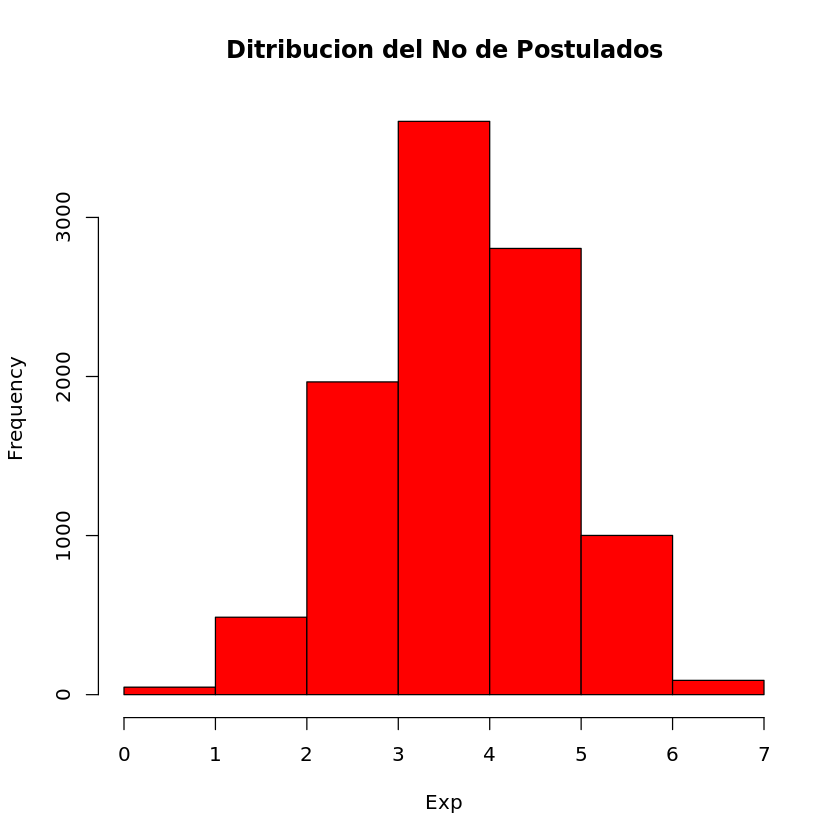

In [75]:
rhyper(nn = 10000,m=M,n=N,k=r) ->Exp

hist(Exp,col="red",main="Ditribucion del No de Postulados",breaks=8)

## Codigo en Python:

- En `Python` tenemos las funciones del paquete `scipy.stats.hypergeom`:

* `pmf(k,M, n, N), cdf(k,M, n, N), ppf(q,M, n, N), rvs(M, n, N, size)` 

donde `M` es el número de objetos del primer tipo, `N` el número de objetos del segundo tipo y `n` el número de extracciones realizadas.

In [13]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [56]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [91]:
#Definimos parametros
[M,n,N] = [20,7,12]
rv = hypergeom(M,n,N)
x = np.arange(0,n+1)
y = rv.pmf(x)
y2 = rv.cdf(x)



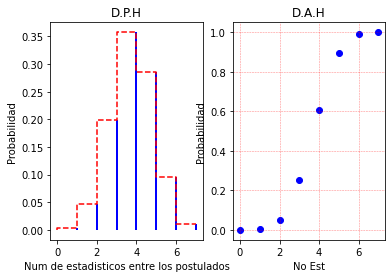

In [87]:
fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2)

#Grafica1
ax1.step(x,y,'r--',linewidth=1.5,linestyle='dashed')
ax1.vlines(x,0,y, lw = 2,alpha = 1,color="blue")
ax1.set_xlabel("Num de estadisticos entre los postulados")
ax1.set_ylabel("Probabilidad")
ax1.set_title("D.P.H")

#Grafica2
ax2.scatter(x,y2,color="blue")
ax2.grid(color='r', alpha=0.5, linestyle='dashed', linewidth=0.5)
ax2.set_xlabel("No Est")
ax2.set_ylabel("Probabilidad")
ax2.set_title("D.A.H")
plt.show()

In [85]:
mean,var,skew,kurt = rv.stats(moments='mvsk')
print("Media:",mean)
print("Varianza:",var)
print("Sesgo:",skew)
print("Curtosis:",kurt)

Media: 4.199999999999999
Varianza: 1.1494736842105264
Sesgo: -0.06218121795609882
Curtosis: -0.15266106442577032
